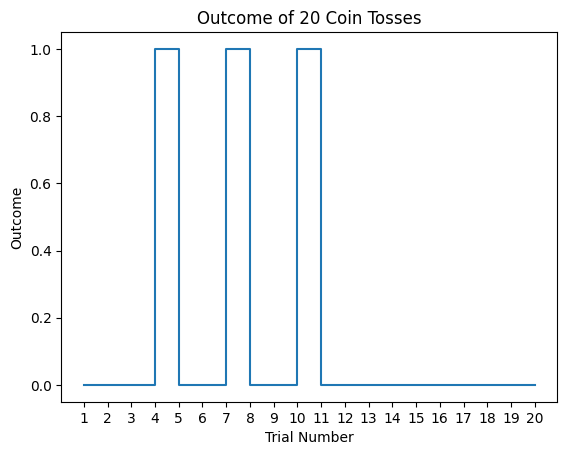

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Function to perform Bernoulli experiments
def aBernoulliExperiment(randomNumGen, bernoulliParam_p=0.5, numRepeatsOfExp=1, numTrialsInAnExp=1, profitLoss=[1,0]):
    observation = randomNumGen.random((numRepeatsOfExp, numTrialsInAnExp))
    index_ge1 = np.less_equal(observation, bernoulliParam_p)
    observation[index_ge1] = profitLoss[0]
    observation[np.invert(index_ge1)] = profitLoss[1]
    return observation

# Part (a)
# Parameters
v_numTrialsInAnExp = 20
v_bernoulliParam_p = 0.2
v_numRepeatsOfExp = 1

# Perform a single experiment with 20 trials
observation = aBernoulliExperiment(np.random.default_rng(1236),
                                    bernoulliParam_p=v_bernoulliParam_p,
                                    numRepeatsOfExp=v_numRepeatsOfExp,
                                    numTrialsInAnExp=v_numTrialsInAnExp,
                                    profitLoss=[1,0])

# Plotting
trial_numbers = np.arange(1, v_numTrialsInAnExp + 1)
plt.step(trial_numbers, observation[0], where='post')
plt.xlabel('Trial Number')
plt.ylabel('Outcome')
plt.title('Outcome of 20 Coin Tosses')
plt.xticks(trial_numbers)
plt.grid(False)
plt.show()



 Each step in the plot represented the outcome (either heads or tails) of a single coin toss. The success probability is 0.2 so we could only obseve head thrice out of twenty times we tossed the coin in the experiment.

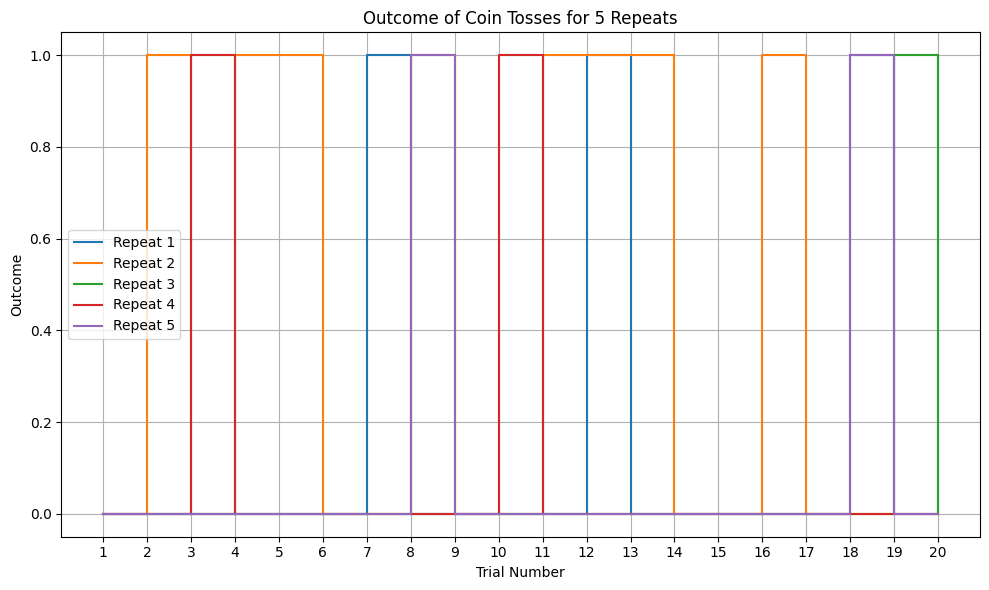

In [13]:

# Part (b)
# Parameters
numRepeats = 5
v_numTrialsInAnExp = 20
v_bernoulliParam_p = 0.2

frequentists = []

# Perform experiments and store outcomes
for _ in range(numRepeats):
    observation = aBernoulliExperiment(np.random.default_rng(),
                                        bernoulliParam_p=v_bernoulliParam_p,
                                        numRepeatsOfExp=1,
                                        numTrialsInAnExp=v_numTrialsInAnExp,
                                        profitLoss=[1, 0])
    frequentists.append(observation)

# Plotting
plt.figure(figsize=(10, 6))
plt.title('Outcome of Coin Tosses for 5 Repeats')
plt.xlabel('Trial Number')
plt.ylabel('Outcome')

# Plot outcomes for each repeat
for i, obs in enumerate(frequentists):
    trial_numbers = np.arange(1, v_numTrialsInAnExp + 1)
    plt.step(trial_numbers, obs[0], where='post', label=f'Repeat {i+1}')

plt.legend()
plt.grid(True)
plt.xticks(np.arange(1, v_numTrialsInAnExp + 1))  # Set x-axis ticks from 1 to 20
plt.tight_layout()
plt.show()


This visualization allowed us to see how the randomness of the coin tosses led to different sequences of outcomes in each repeat. Despite the same underlying probability of getting heads (0.2), the actual outcomes varied due to chance, resulting in different patterns of heads and tails for each repeat.

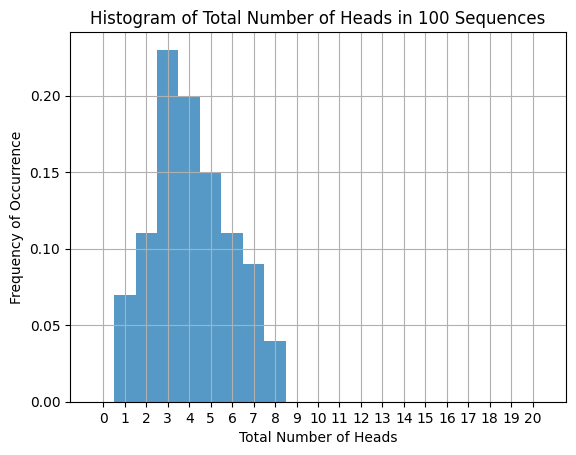

In [14]:
# Part (c)
# Parameters
v_numTrialsInAnExp = 20
v_numRepeatsOfExp = 100
v_bernoulliParam_p = 0.2

# Perform 100 experiments with 20 trials each
observation = aBernoulliExperiment(np.random.default_rng(1236),
                                    bernoulliParam_p=v_bernoulliParam_p,
                                    numRepeatsOfExp=v_numRepeatsOfExp,
                                    numTrialsInAnExp=v_numTrialsInAnExp,
                                    profitLoss=[1,0])

# Calculate total number of 1s (heads) for each sequence
total_ones = np.sum(observation, axis=1)

# Plot histogram
plt.hist(total_ones, bins=np.arange(v_numTrialsInAnExp + 2) - 0.5, density=True, alpha=0.75)  # Adjust bins for integer x-axis ticks
plt.xlabel('Total Number of Heads')
plt.ylabel('Frequency of Occurrence')
plt.title('Histogram of Total Number of Heads in 100 Sequences')
plt.xticks(range(v_numTrialsInAnExp + 1))  # Set x-axis ticks from 0 to 20
plt.grid(True)
plt.show()

we conducted 100 sequences of 20 coin tosses each, where the probability of getting heads (1) on each toss was 0.2. After completing these sequences, we calculated the total number of heads observed in each sequence. Also, it can be seen, obtaining more than 9 heads in a sequence of 20 coin tosses is relatively rare based on the experimental data.

This observation is in line with the expected behavior because with a probability of heads (1) of 0.2 and 20 coin tosses per experiment, the theoretical maximum number of heads would be 20. However, the probability of obtaining a large number of heads decreases rapidly as the number of heads increases.

The PMF of this histogram is Binomial as each sequence of 20 coin tosses can be considered as a binomial random variable, where the outcome of each coin toss (head or tail) is a Bernoulli trial with a probability of success (getting heads) of 0.2. When we repeat this binomial experiment 100 times, the histogram of the total number of heads observed in each sequence closely resembles the PMF of the binomial distribution.

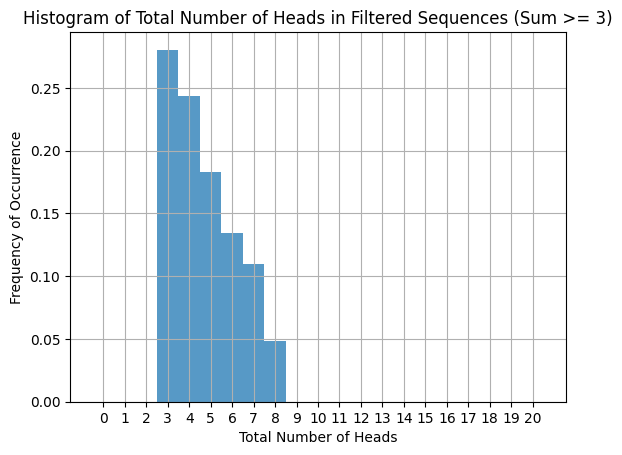

In [15]:
# Part (d)
# Filter sequences with at least 3 heads
filtered_sequences = observation[np.sum(observation, axis=1) >= 3]

# Calculate total number of 1s (heads) for each filtered sequence
total_ones_filtered = np.sum(filtered_sequences, axis=1)

# Plot histogram
plt.hist(total_ones_filtered, bins=np.arange(22) - 0.5, density=True, alpha=0.75)  # Adjust bins for integer x-axis ticks
plt.xlabel('Total Number of Heads')
plt.ylabel('Frequency of Occurrence')
plt.title('Histogram of Total Number of Heads in Filtered Sequences (Sum >= 3)')
plt.xticks(range(21))  # Set x-axis ticks from 0 to 20
plt.grid(True)
plt.show()

In Part (d) of the experiment, where we filtered the sequences to include only those with at least 3 heads, the histogram illustrates how the frequencies of total number of heads change as the value increases along the x-axis. As expected, the frequencies generally decrease as we move from lower to higher values on the x-axis.

If X is the Binomial Random Variable in consideration, then the above histogram approximates the PMF of X conditioned on the event: X >= 3

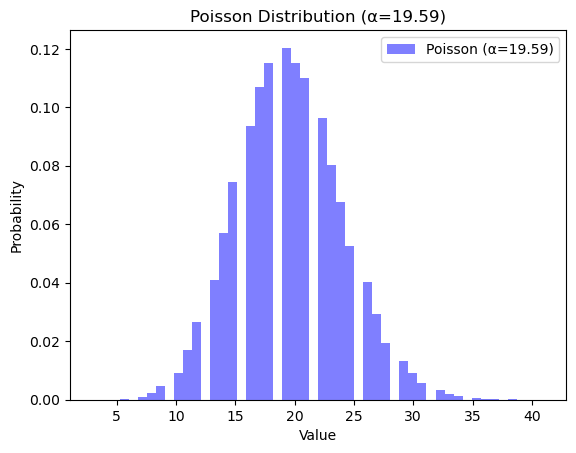

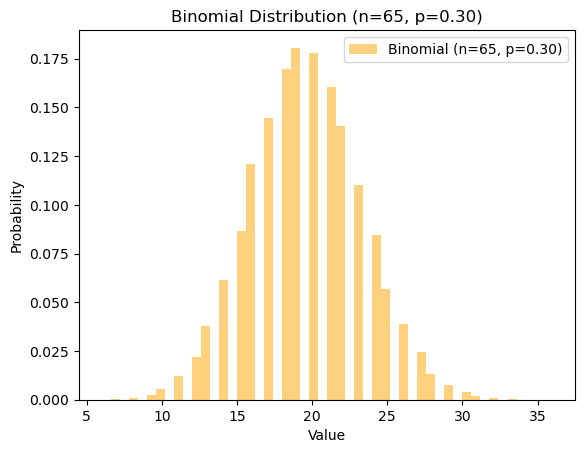

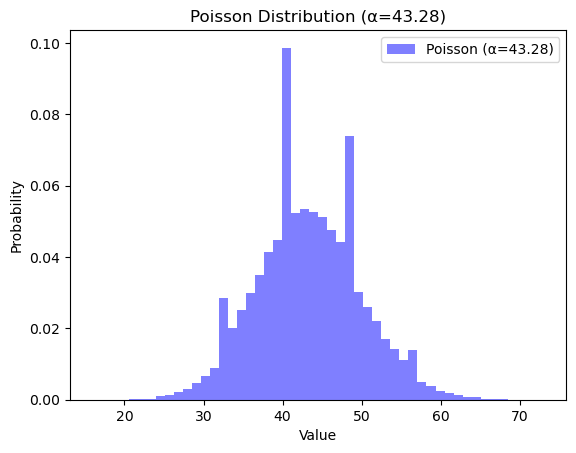

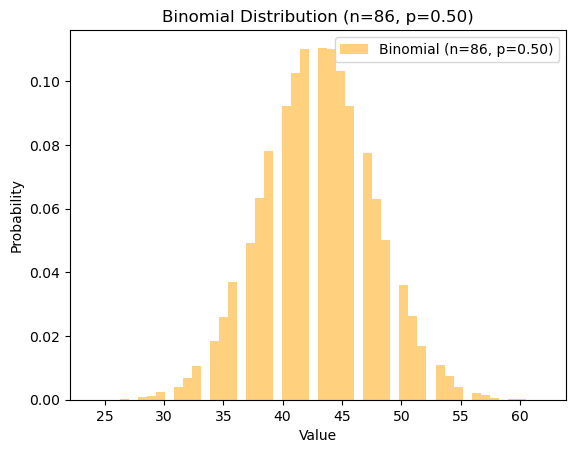

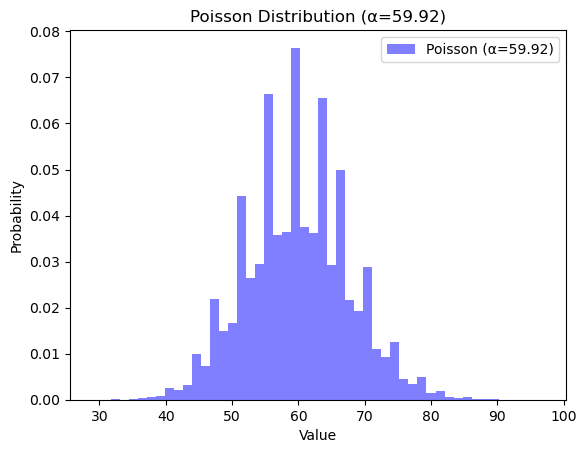

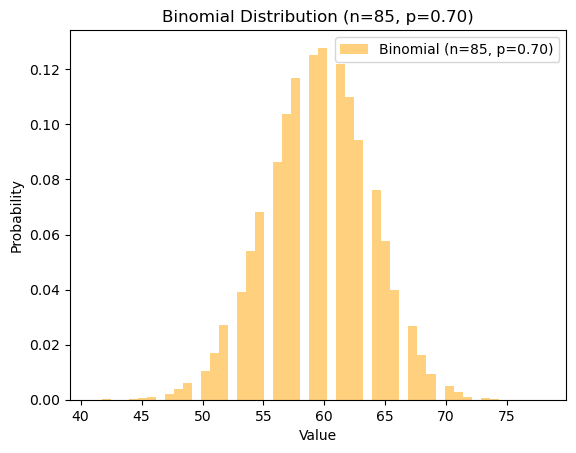

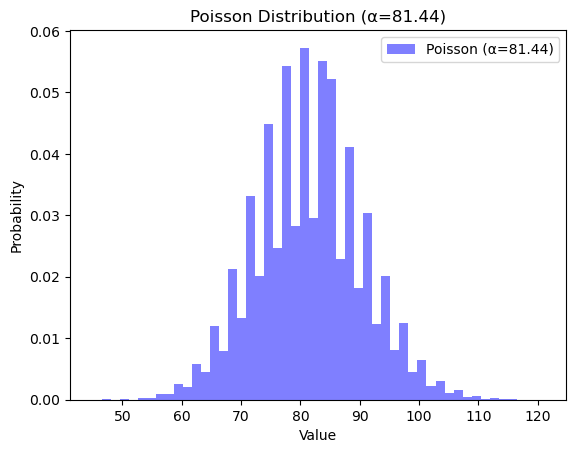

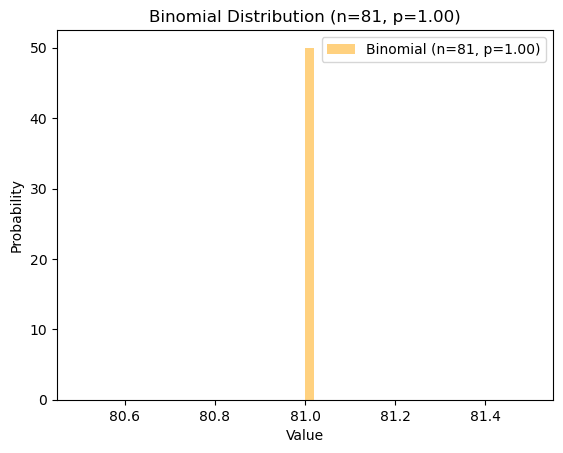

In [1]:
# Number of simulations
num_simulations = 100000

# Function to simulate and plot Poisson distribution
def plot_poisson(alpha):
    poisson_data = np.random.poisson(alpha, num_simulations)
    plt.hist(poisson_data, bins=50, alpha=0.5, color='blue', label=f'Poisson (α={alpha:.2f})', density=True)
    plt.title(f'Poisson Distribution (α={alpha:.2f})')
    plt.xlabel('Value')
    plt.ylabel('Probability')
    plt.legend()
    plt.show()

# Function to simulate and plot binomial distribution
def plot_binomial(alpha, p):
    n = int(alpha / p)
    binomial_data = np.random.binomial(n, p, num_simulations)
    plt.hist(binomial_data, bins=50, alpha=0.5, color='orange', label=f'Binomial (n={n}, p={p:.2f})', density=True)
    plt.title(f'Binomial Distribution (n={n}, p={p:.2f})')
    plt.xlabel('Value')
    plt.ylabel('Probability')
    plt.legend()
    plt.show()

# Values of p for the binomial distribution
p_values = [0.3, 0.5, 0.7, 1]

# Simulate and plot for each value of p
for p in p_values:
    # Randomly select alpha from the range (0, 100)
    alpha = np.random.uniform(0, 100)

    # Plot Poisson distribution
    plot_poisson(alpha)

    # Plot binomial distribution

    plot_binomial(alpha, p)

For the Poisson distribution, we're randomly selecting a value of α from the interval (0, 100).  We then simulate the Poisson distribution with this parameter.

For the Binomial distribution, we're fixing the number of trials (n) while varying the probability of success (p). For each value of α chosen for the Poisson distribution, we calculate the corresponding value of n using the formula n = α / p, where p is chosen from the list of values [0.3, 0.5, 0.7, 1].

We observe that binomial behaves like poission when the value of p is small. As the value of p increases and reaches to 1 the binomial concetrates at its mean, resembling a Poisson distribution with a lower rate of occurrence.

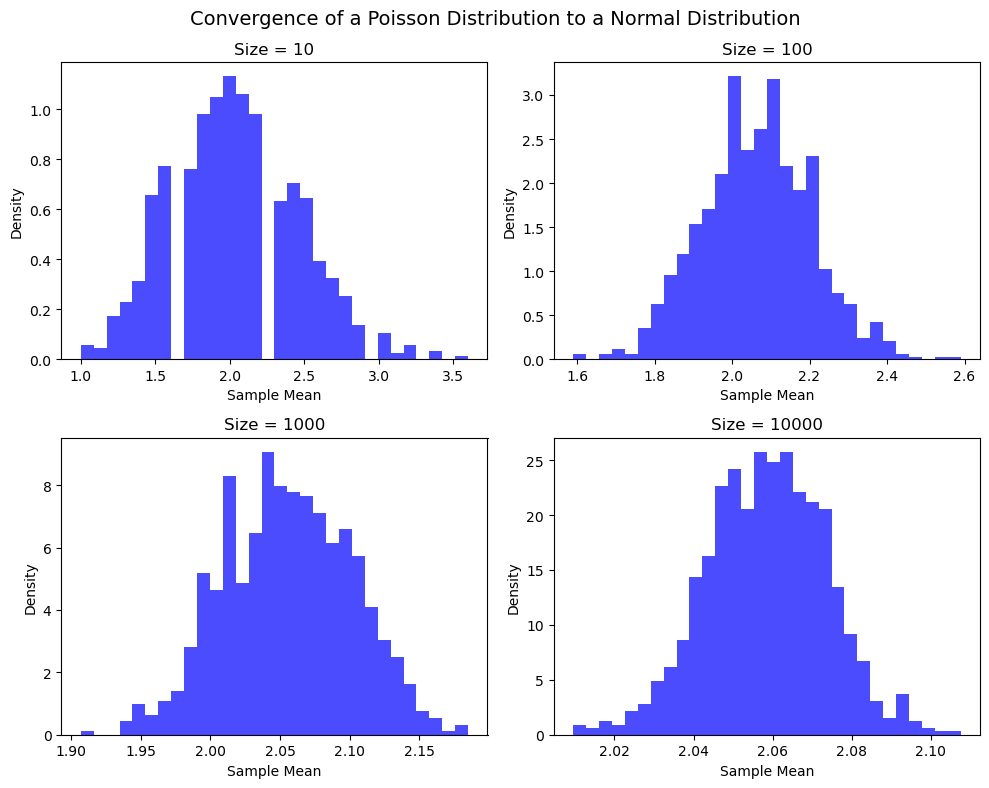

In [2]:
def plot_poisson(alpha):
    list_of_sizes = [10, 100, 1000, 10000]
    number_of_plots = len(list_of_sizes)

    # Simulating Poisson distributions and calculating their sample means
    list_of_means = []
    for size in list_of_sizes:
        samples = np.random.poisson(alpha, size=(1000, size))
        means = np.mean(samples, axis=1)
        list_of_means.append(means)

    fig, axes = plt.subplots(2, 2, figsize=(10, 8))
    axes = axes.flatten()

    # Plotting the sample means for each size
    for i in range(number_of_plots):
        axes[i].hist(list_of_means[i], bins=30, density=True, color='blue', alpha=0.7)
        axes[i].set_title(f'Size = {list_of_sizes[i]}')
        axes[i].set_xlabel('Sample Mean')
        axes[i].set_ylabel('Density')

    fig.suptitle('Convergence of a Poisson Distribution to a Normal Distribution', fontsize=14)

    plt.tight_layout()
    plt.show()
    
# Choosing 2 random alphas between 1 and 20
alphas = np.random.uniform(1,20, size=(2,))
a1, a2 = alphas[0], alphas[1]

# For 1st value of alpha
plot_poisson(a1)

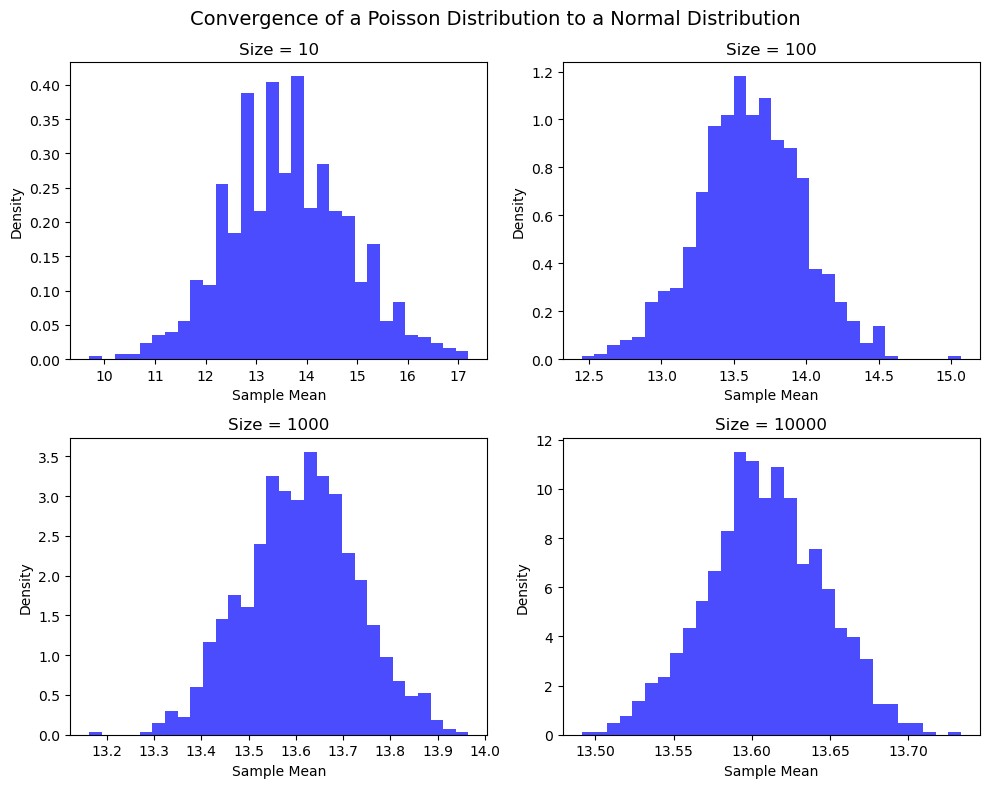

In [3]:
# For 2nd value of alpha
plot_poisson(a2)

plot_poisson is a function which plots 4 graphs of the sample means of an increasing sequence iid Poisson Random Variables. We have chosen the sizes of the sequences to be 10, 100, 1000 and 10000. 

We observe that as the size of the sequence grows, the plot seems to converge into that of a bell-curve. This illustrates the Central Limit Theorem for large numbers(size of sequences).

We conduct this experiment twice for 2 random values of alpha, chosen from Uniform~(1, 20)